# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

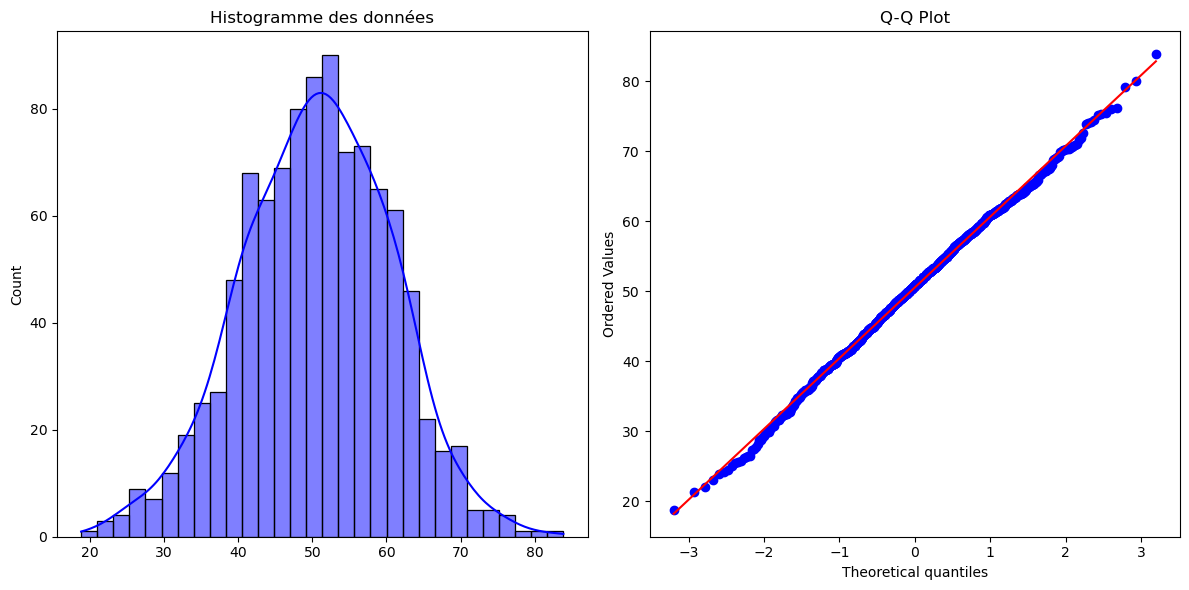

Shapiro-Wilk Test: Statistique = 0.9984, p-valeur = 0.4695
D'Agostino Test: Statistique = 2.0166, p-valeur = 0.3648
Les données suivent une loi normale (p > 0.05).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, probplot

# Générer des données aléatoires suivant une loi normale
  # Pour des résultats reproductibles
data = np.random.normal(loc=50, scale=10, size=1000)  # Moyenne = 50, Écart-type = 10

# 1. Visualiser les données
plt.figure(figsize=(12, 6))

# Histogramme
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, bins=30, color="blue")
plt.title("Histogramme des données")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

# 2. Tests de normalité

# Test de Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(data)
print(f"Shapiro-Wilk Test: Statistique = {shapiro_stat:.4f}, p-valeur = {shapiro_p:.4f}")

# Test de D'Agostino (normaltest)
dagostino_stat, dagostino_p = normaltest(data)
print(f"D'Agostino Test: Statistique = {dagostino_stat:.4f}, p-valeur = {dagostino_p:.4f}")

# Interprétation des p-valeurs
alpha = 0.05
if shapiro_p > alpha and dagostino_p > alpha:
    print("Les données suivent une loi normale (p > 0.05).")
else:
    print("Les données ne suivent PAS une loi normale (p <= 0.05).")


  Variable     Shapiro_p    Dagostino_p Normalité
0     Var1  6.272578e-01   2.758884e-01       Oui
1     Var2  4.182496e-17  5.560247e-155       Non
2     Var3  1.307539e-30   1.013539e-68       Non
3     Var4  3.987358e-01   7.257281e-01       Oui
4     Var5  1.417281e-31   3.113915e-75       Non
5     Var6  3.861795e-01   6.119197e-01       Oui
6     Var7  3.390522e-13   2.970846e-11       Non


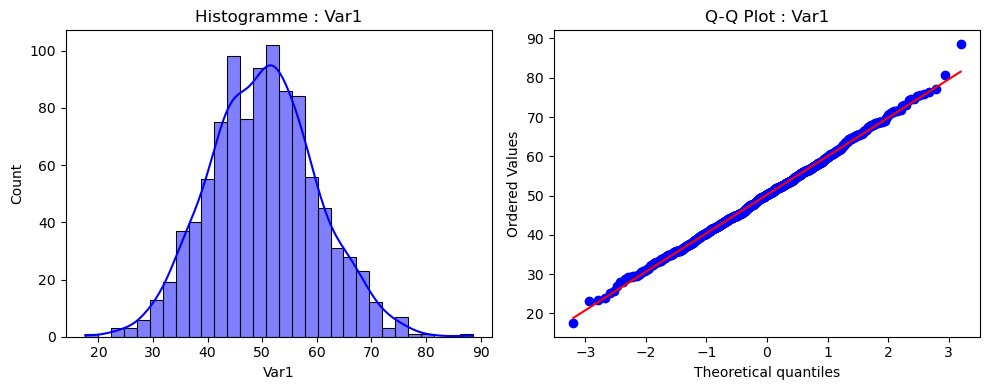

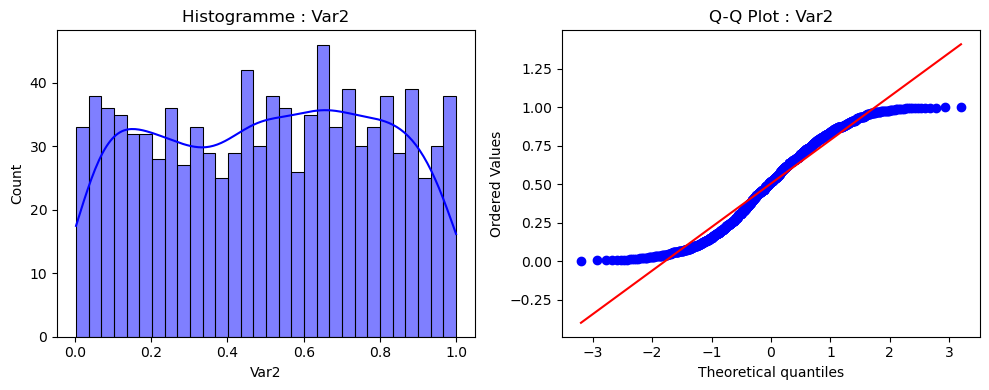

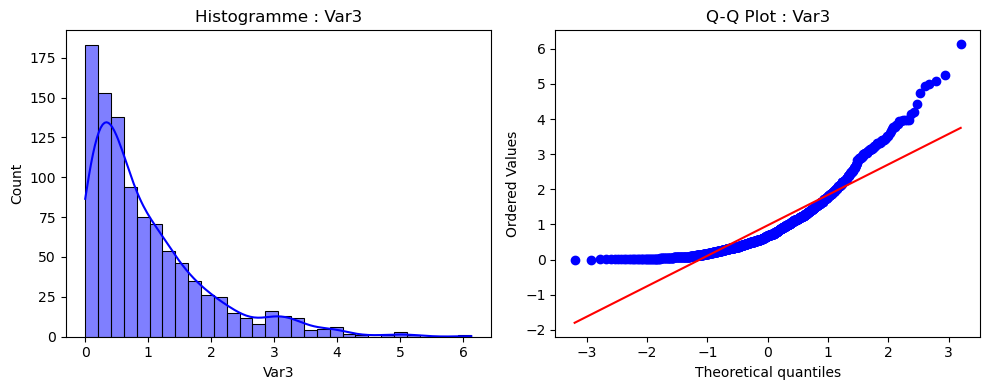

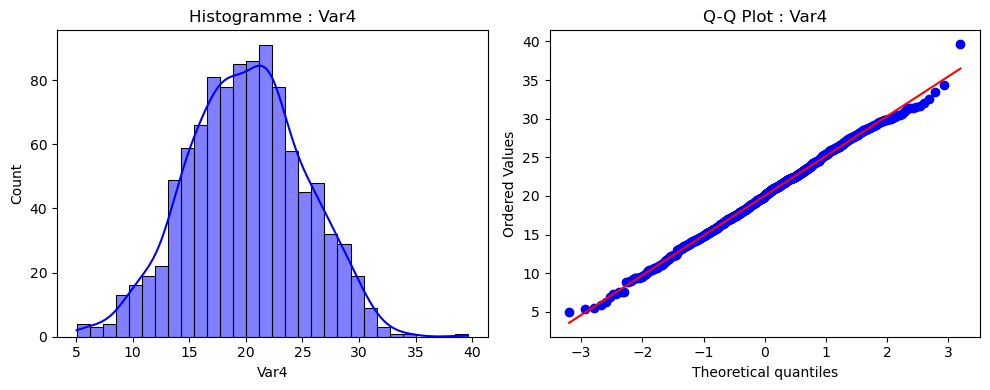

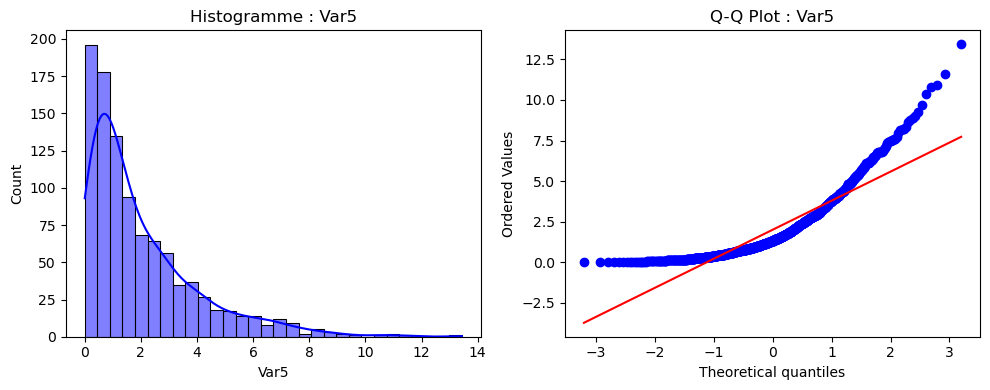

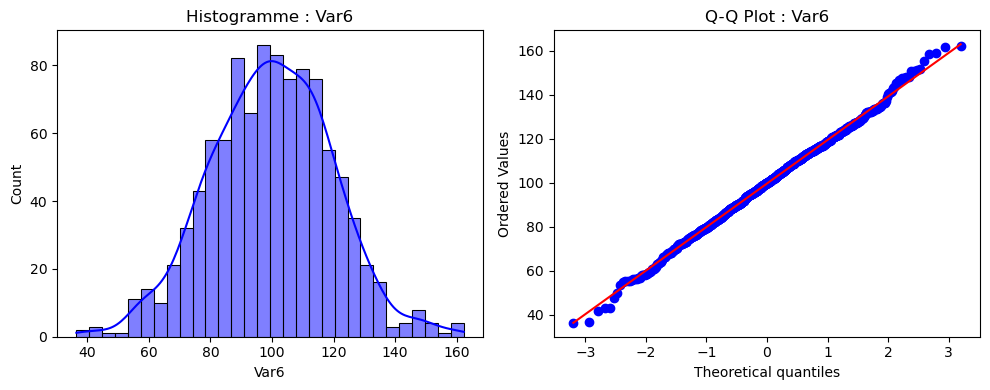

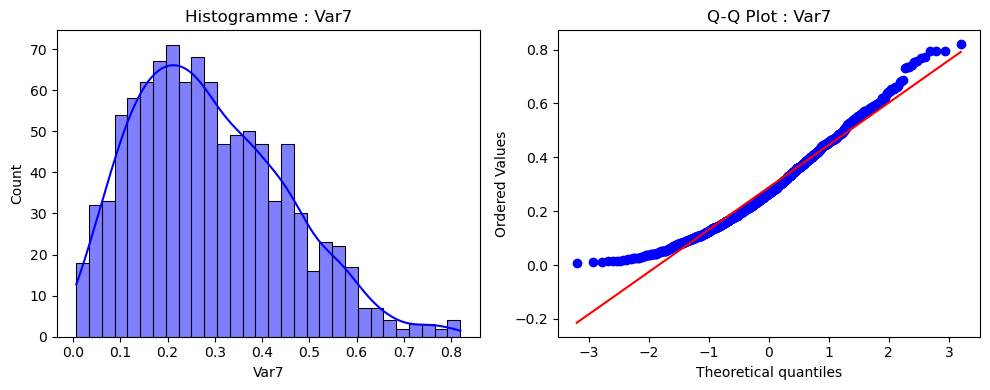

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, probplot

# Générer un dataset de test avec 7 variables
np.random.seed(42)
data = pd.DataFrame({
    "Var1": np.random.normal(50, 10, 1000),   # Suit une loi normale
    "Var2": np.random.uniform(0, 1, 1000),   # Ne suit pas une loi normale
    "Var3": np.random.exponential(1, 1000),  # Ne suit pas une loi normale
    "Var4": np.random.normal(20, 5, 1000),   # Suit une loi normale
    "Var5": np.random.chisquare(df=2, size=1000), # Ne suit pas une loi normale
    "Var6": np.random.normal(100, 20, 1000), # Suit une loi normale
    "Var7": np.random.beta(2, 5, 1000)       # Ne suit pas une loi normale
})

# Vérifier la normalité pour chaque variable
results = []
for column in data.columns:
    # Test de Shapiro-Wilk
    shapiro_stat, shapiro_p = shapiro(data[column])

    # Test de D'Agostino
    dagostino_stat, dagostino_p = normaltest(data[column])

    # Stocker les résultats
    results.append({
        "Variable": column,
        "Shapiro_p": shapiro_p,
        "Dagostino_p": dagostino_p,
        "Normalité": "Oui" if shapiro_p > 0.05 and dagostino_p > 0.05 else "Non"
    })

# Convertir les résultats en DataFrame pour les afficher
results_df = pd.DataFrame(results)
print(results_df)

# Visualisation : Histogrammes et Q-Q plots pour chaque variable
for column in data.columns:
    plt.figure(figsize=(10, 4))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color="blue")
    plt.title(f"Histogramme : {column}")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(data[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot : {column}")

    plt.tight_layout()
    plt.show()


### Résultats de la classification KNN ###
Accuracy sans normalisation : 0.98
Accuracy avec MinMaxScaler : 0.93
Accuracy avec StandardScaler : 0.91


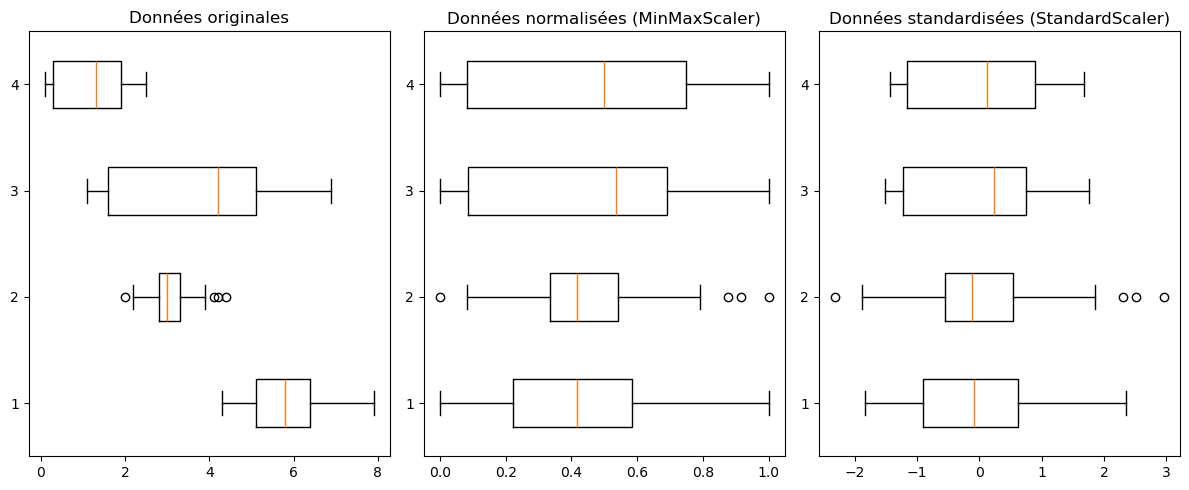

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Charger le dataset Iris
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# 1. **Sans normalisation**
knn.fit(X_train, y_train)
y_pred_no_norm = knn.predict(X_test)
accuracy_no_norm = accuracy_score(y_test, y_pred_no_norm)

# 2. **Avec normalisation (MinMaxScaler)**
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

knn.fit(X_train_minmax, y_train)
y_pred_minmax = knn.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

# 3. **Avec standardisation (StandardScaler)**
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

knn.fit(X_train_standard, y_train)
y_pred_standard = knn.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

# Résumé des résultats
print("### Résultats de la classification KNN ###")
print(f"Accuracy sans normalisation : {accuracy_no_norm:.2f}")
print(f"Accuracy avec MinMaxScaler : {accuracy_minmax:.2f}")
print(f"Accuracy avec StandardScaler : {accuracy_standard:.2f}")

# Visualisation de la distribution des données avant et après normalisation
plt.figure(figsize=(12, 5))

# Distribution des données originales
plt.subplot(1, 3, 1)
plt.boxplot(X_train, vert=False)
plt.title("Données originales")

# Distribution après MinMaxScaler
plt.subplot(1, 3, 2)
plt.boxplot(X_train_minmax, vert=False)
plt.title("Données normalisées (MinMaxScaler)")

# Distribution après StandardScaler
plt.subplot(1, 3, 3)
plt.boxplot(X_train_standard, vert=False)
plt.title("Données standardisées (StandardScaler)")

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Charger le dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data  # Variables indépendantes
y = diabetes.target  # Variable cible


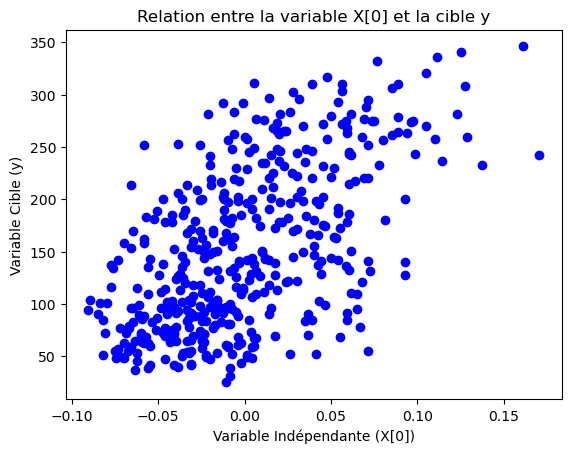

In [6]:
import matplotlib.pyplot as plt

# Choisir une variable indépendante (par exemple, la première variable X[:, 0])
X_feature = X[:, 2]

# Tracer y en fonction de la première variable indépendante
plt.scatter(X_feature, y, color='blue')
plt.xlabel("Variable Indépendante (X[0])")
plt.ylabel("Variable Cible (y)")
plt.title("Relation entre la variable X[0] et la cible y")
plt.show()


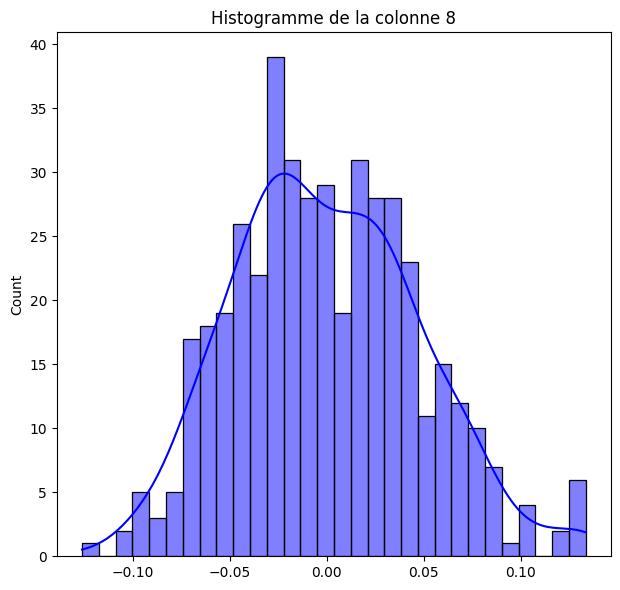

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, probplot

# Supposons que X soit un tableau de données et que X[:, 2] soit une colonne que tu souhaites analyser
column = 8  # Numéro de la colonne à analyser (par exemple, X[:, 2] pour la troisième colonne)

# Créer un graphique avec l'histogramme et la courbe de densité
plt.figure(figsize=(12, 6))  # Taille de la figure pour afficher 2 graphiques côte à côte

plt.subplot(1, 2, 1)  # Diviser la figure en 1 ligne, 2 colonnes, et choisir la première position
sns.histplot(X[:, column], kde=True, bins=30, color="blue")
plt.title(f"Histogramme de la colonne {column}")


# Afficher les graphiques
plt.tight_layout()
plt.show()


In [ ]:
# @title Titre par défaut
import numpy as np
from scipy.stats import zscore
z_scores = np.abs(zscore(X))  # X = Variables continues
outliers = (z_scores > 3)  # Identifier les valeurs aberrantes


test Z score (valeurs aberrantes)


In [8]:
from sklearn.feature_selection import f_classif
F_values, p_values = f_classif(X, y)  # X = Variables continues, y = Cible (catégorielle)


In [9]:
from sklearn.feature_selection import SelectKBest, chi2
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)  # X = Variables explicatives (catégorielles), y = Cible (catégorielle)


ValueError: Input X must be non-negative.

In [ ]:
from scipy.stats import pearsonr

# X, y : variables continues
corr, p_value = pearsonr(X, y)
print(f"Corrélation de Pearson : {corr}, P-value : {p_value}")
#Si p-value < 0.05, cela indique qu'il existe une corrélation statistiquement significative entre les deux variables.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supposons que X est ton jeu de données (par exemple, 1000 variables)
# 1. Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Appliquer PCA
pca = PCA(n_components=2)  # On réduit à 2 dimensions pour visualisation
X_pca = pca.fit_transform(X_scaled)

# 3. Visualiser les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Projection des données dans les 2 premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

# 4. Vérifier la variance expliquée
print(f"Variance expliquée par chaque composante principale : {pca.explained_variance_ratio_}")


In [ ]:
# création det generation de  ouvelles caractéristques avec ses outils 
#Featuretools , AutoFeat , DIFER , NFS 